# Bayesian Networks

Result of the inference using SamIam

![title](images/samiam.png)

Now we implement our Variable Elimination

In [1]:
import networkx as nx
import itertools
import numbers
import pprint
import operator
import matplotlib.pyplot as plt
from functools import reduce


pp = pprint.PrettyPrinter(indent=4)


def prod(iterable):
    return reduce(operator.mul, iterable, 1)


class BayesianNetwork(object):
    def __init__(self):
        self.variables = {}
        self.G = nx.DiGraph()
        self.CPD = {}

    def add_variable(self, variable, parent=None):
        self.G.add_node(variable)
        if parent is not None and parent in self.G.nodes:
            self.G.add_edge(parent, variable)

    def add_cpd(self, variable, table):
        # Todo: verify if the table corresponds to the variable
        if variable not in self.G.nodes:
            print('%s variable doesn\'t exist.', variable)
            print('Valids are:', self.G.nodes)
            return
        self.CPD[variable] = table

    def plot(self):
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos)
        nx.draw_networkx_labels(self.G, pos)

        plt.show()

    def infer(self, variable):
        """
        Implement infer using variable elimination
        """
        parents = self.G.in_edges(variable)
        if not parents:
            return self.CPD.get(variable, [])

        cpd_parents = []
        for parent, _ in parents:
            cpd_parents.append(self.infer(parent))
        cpd = self.CPD.get(variable)

        x = [prod(i) for i in itertools.product(*cpd_parents)]
        res = []
        for elems in zip(*cpd):
            res.append(
                sum([e * i for e, i in zip(elems, x)]))
        return res

We are going to model the student bayesian network. First we are going to add all the variables:

In [2]:
model = BayesianNetwork()
model.add_variable('diff')
model.add_variable('intel')
model.add_variable('grade', 'intel')
model.add_variable('grade', 'diff')
model.add_variable('letter', 'grade')
model.add_variable('sat', 'intel')

Check if the model is ok

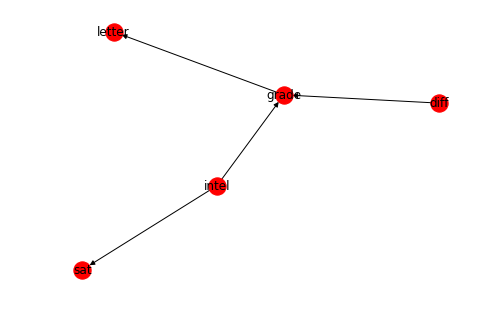

In [3]:
model.plot()

Now, we are going to add the CPD for the model

In [4]:
model.add_cpd('diff', [0.6, 0.4])
model.add_cpd('intel', [0.7, 0.3])
model.add_cpd('sat', [[0.95, 0.05], [0.2, 0.8]])
model.add_cpd(
    'grade',
    [
        [0.3, 0.4, 0.3],
        [0.05, 0.25, 0.7],
        [0.9, 0.08, 0.02],
        [0.5, 0.3, 0.2],
    ]
)
model.add_cpd('letter', [[0.1, 0.9], [0.4, 0.6], [0.99, 0.01]])

and now check if the inferences are the same

In [6]:
model.infer('diff')

[0.6, 0.4]

In [7]:
model.infer('intel')

[0.7, 0.3]

In [8]:
model.infer('sat')

[0.7249999999999999, 0.27499999999999997]

In [9]:
model.infer('grade')

[0.36200000000000004, 0.2884, 0.34959999999999997]

In [10]:
model.infer('letter')

[0.497664, 0.5023360000000001]

As we can see we have the same values